In [1]:
from textblob import TextBlob
import speech as sp
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
def get_phrase_sentiment(phrase):
    analysis = TextBlob(phrase)
    if analysis.sentiment.polarity > 0:
        return 'positive', analysis.sentiment.polarity
    elif analysis.sentiment.polarity == 0:
        return 'neutral', analysis.sentiment.polarity
    else:
        return 'negative', analysis.sentiment.polarity


def get_phrase_subjectivity(phrase):
    analysis = TextBlob(phrase)
    if analysis.sentiment.subjectivity > 0.5:
        return "subjective", float(format(analysis.sentiment.subjectivity, '.2f'))

    elif analysis.sentiment.subjectivity == 0.5:
        return "neutral", float(format(analysis.sentiment.subjectivity, '.2f'))

    else:
        return "objective", float(format(analysis.sentiment.subjectivity, '.2f'))

In [3]:
token_list_transcript = [ j for i in sp.transcript_strings for j in i.split()]

phrase_sentiment_values = [get_phrase_sentiment(i) for i in token_list_transcript]
phrase_subjectivity_values = [get_phrase_subjectivity(i) for i in token_list_transcript]
overall_sentiment_value = get_phrase_sentiment(" ".join(token_list_transcript))
overall_subjective_value = get_phrase_subjectivity(" ".join(token_list_transcript))

df = pd.DataFrame({"variable":token_list_transcript,
         "flow_sentiment_values": phrase_sentiment_values,
         "subjectivity_values" : phrase_subjectivity_values} )

df["polarity"] = df.flow_sentiment_values.apply(lambda i:i[1])
df["sentiment_nature"] = df.flow_sentiment_values.apply(lambda i:i[0])
df = df.drop("flow_sentiment_values", 1)

df["subjective_value"] = df.subjectivity_values.apply(lambda i:i[1])
df["subjective_nature"] = df.subjectivity_values.apply(lambda i:i[0])
df = df.drop("subjectivity_values", 1)

print(df.head())

    variable  polarity sentiment_nature  subjective_value subjective_nature
0      hello      0.00          neutral               0.0         objective
1      hello      0.00          neutral               0.0         objective
2  beautiful      0.85         positive               1.0        subjective
3         oh      0.00          neutral               0.0         objective
4        hey      0.00          neutral               0.0         objective


Polarity flow through out the Speech
Dotted Line Indicates the Overall Polarity in the Speech


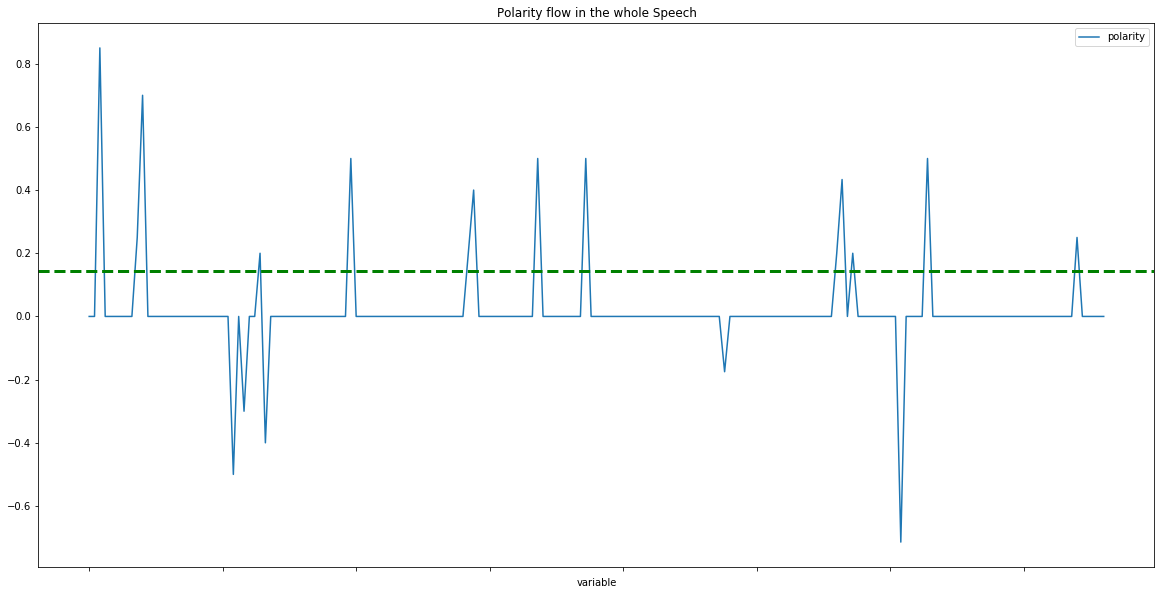

In [4]:
ax = df.plot(x="variable",y="polarity", title="Polarity flow in the whole Speech", figsize=(20,10))
if overall_sentiment_value[1] > 0:
    ax.axhline(y=overall_sentiment_value[1], linestyle="--", c="g", linewidth=3.0)
else:
    ax.axhline(y=overall_sentiment_value[1], linestyle="--", c="r", linewidth=3.0)
print("Polarity flow through out the Speech")
print("Dotted Line Indicates the Overall Polarity in the Speech")
plt.show()

# Polarity > 0 indicates POSITIVE word in the speech. Polarity < 0 indicates NEGATIVE word in the speech. Polarity = 0 indicates NEUTRAL word in the speech. 

Frequency of words with corresponding polarity the Speech
Dotted Line is on Neutral Words frequncy and seperates positive and negative word frequencies


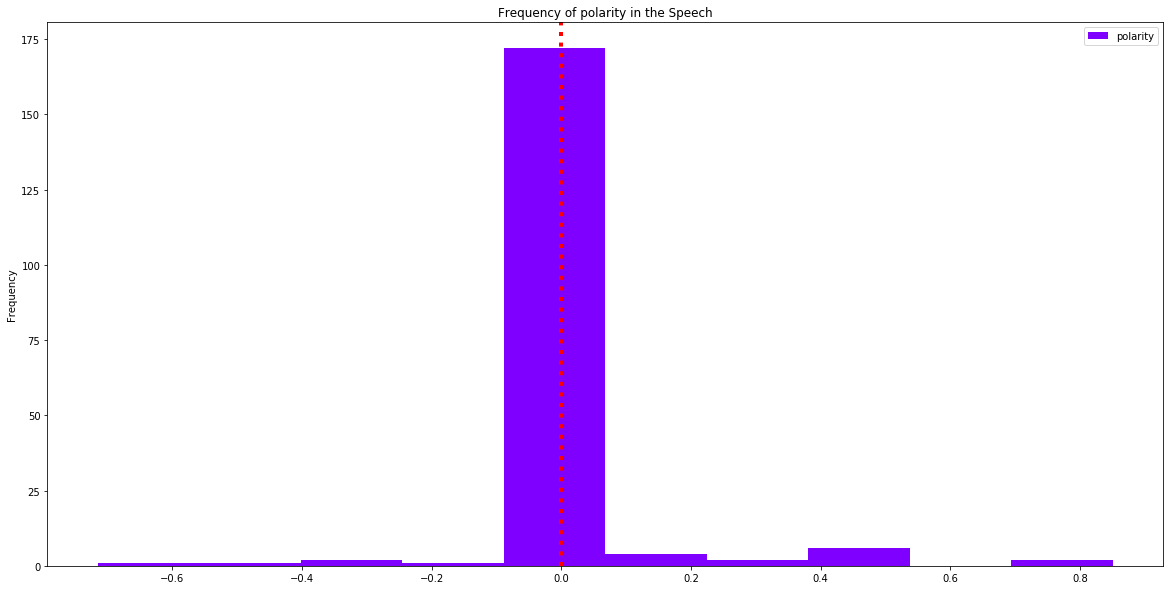

In [17]:
ax = df.plot(x="variable",y="polarity", title="Frequency of polarity in the Speech", kind="hist", figsize=(20,10), colormap="rainbow")
ax.axvline(x=0.0, c='r',linestyle=":",linewidth=4.0)
print("Frequency of words with corresponding polarity the Speech")
print("Dotted Line is on Neutral Words frequncy and seperates positive and negative word frequencies")
plt.show()

Subjectivity flow through out the Speech
Dotted Line Indicates the Overall Subjectivity in the Speech


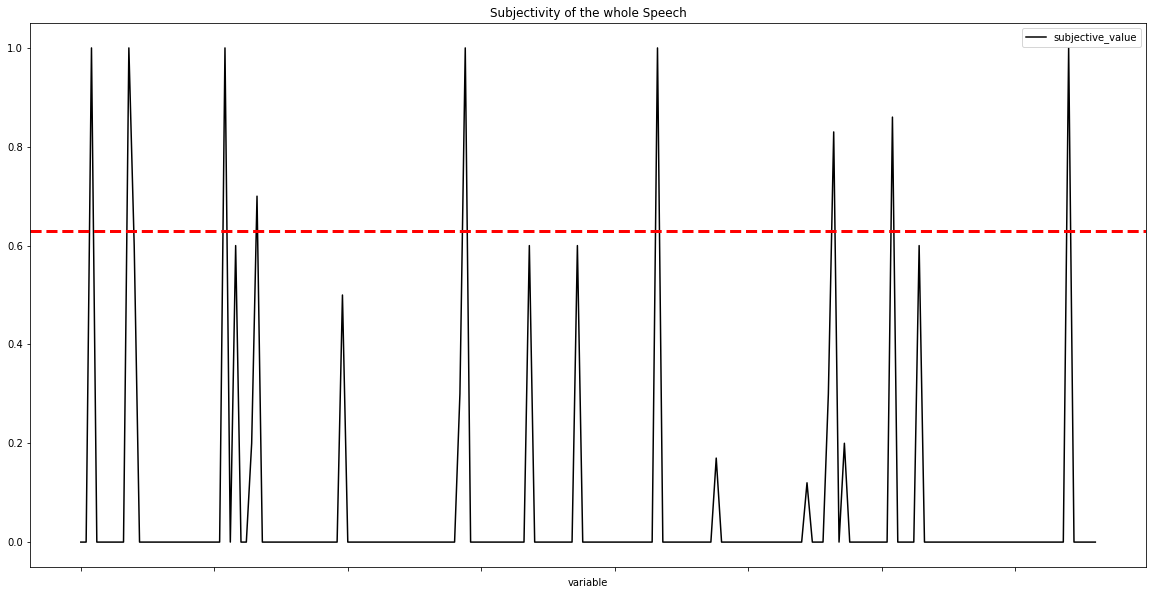

In [6]:
bx = df.plot(x="variable",y="subjective_value", title="Subjectivity of the whole Speech", figsize=(20,10),colormap="copper")
if overall_subjective_value[1] > 0.5:
    bx.axhline(y=overall_subjective_value[1], linestyle="--", c="r", linewidth=3.0)
else:
    bx.axhline(y=overall_subjective_value[1], linestyle="--", c="g", linewidth=3.0)
print("Subjectivity flow through out the Speech")
print("Dotted Line Indicates the Overall Subjectivity in the Speech")
plt.show()

# Subjectivity >= 0.5 indicates word in the speech is OBJECTIVE in nature. Subjectivity < 0.5 indicates word in the speech is SUBJECTIVE in nature. Subjectivity = 0 indicates NEUTRAL word in the speech.

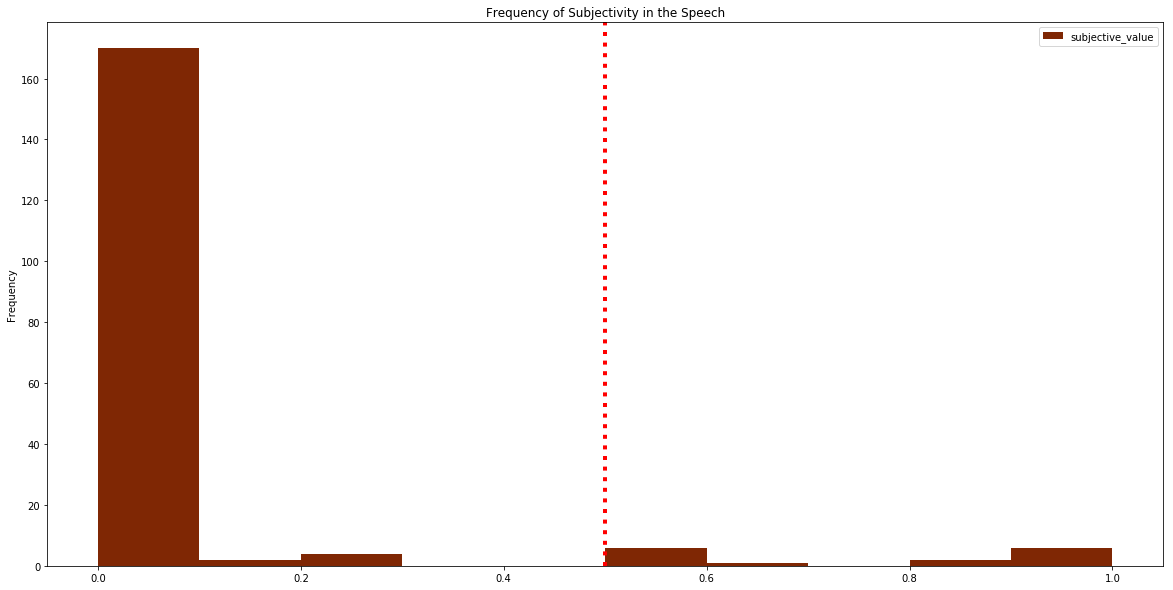

In [7]:
bx = df.plot(x="variable",y="subjective_value", title="Frequency of Subjectivity in the Speech", kind="hist", figsize=(20,10), colormap="Oranges_r")
bx.axvline(x=0.5, c='r',linestyle=":",linewidth=4.0)
plt.show()

In [8]:
transcript_pos_words = df[df["sentiment_nature"]=="positive"]["variable"].tolist()
transcript_neg_words = df[df["sentiment_nature"]=="negative"]["variable"].tolist()
transcript_neut_words = df[df["sentiment_nature"]=="neutral"]["variable"].tolist()

def wordcloud_figure(data, color = 'black'):
    cleaned_word = [word.replace(":","") for word in data]
    cleaned_word = [word.replace("?","") for word in data]
    cleaned_word = [word.replace(";","") for word in data]
    cleaned_word = [word.replace(",","") for word in data]
    new_data = " ".join(cleaned_word)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(new_data)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    if color=="white":
        plt.suptitle("Positive Words Used", fontsize=25)
    if color=="red":
        plt.suptitle("Negative Words Used", fontsize=25)
    if color not in ["red","white"]:
        plt.suptitle("Neutral Words Used", fontsize=25)
    plt.show()

Positive Words Found In The Speech


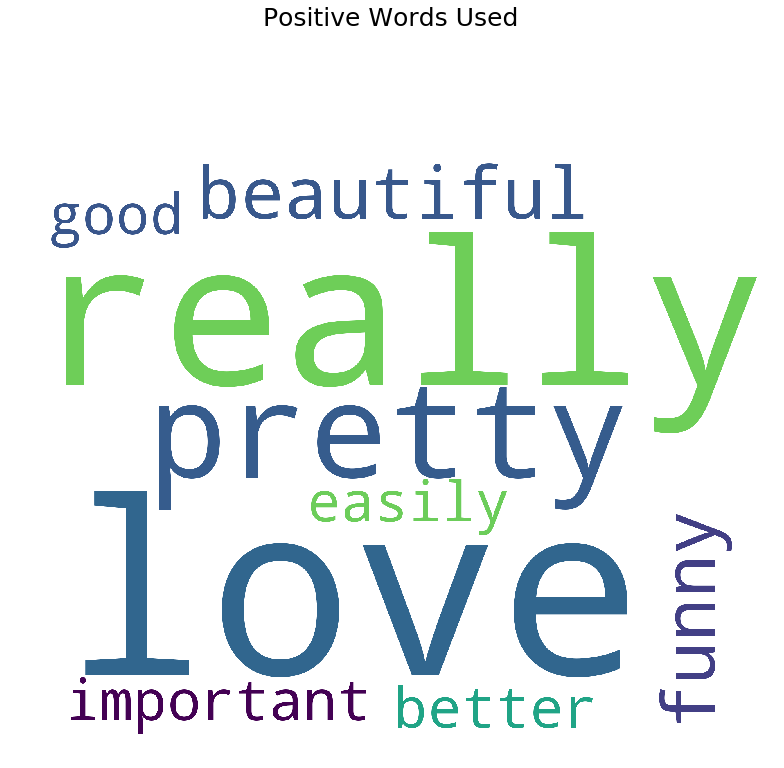

In [9]:
print("Positive Words Found In The Speech")
wordcloud_figure(transcript_pos_words,'white')

Negative Words Found In The Speech


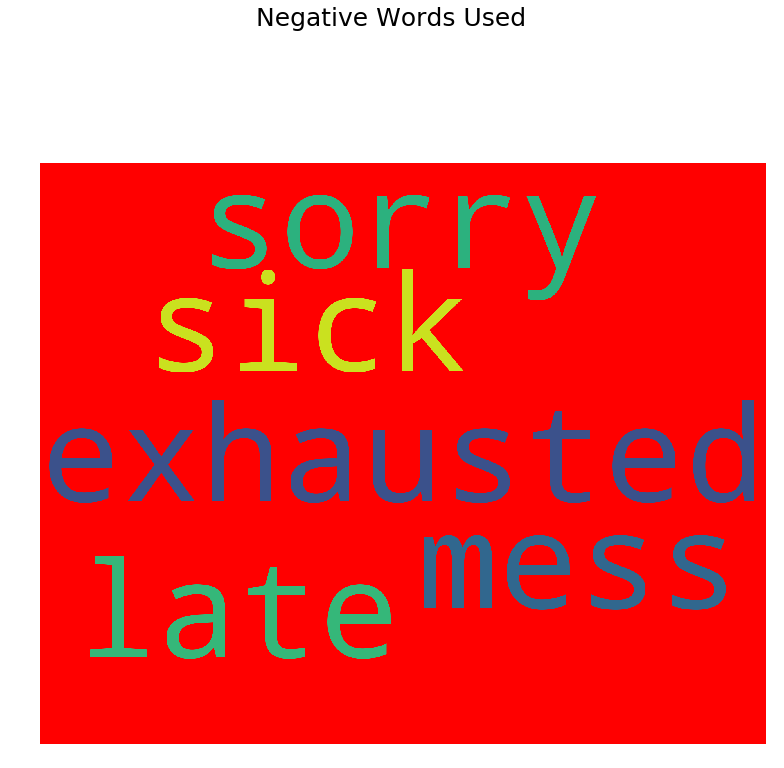

In [10]:
print("Negative Words Found In The Speech")
wordcloud_figure(transcript_neg_words,'red')

Neutral Words Found in the Speech


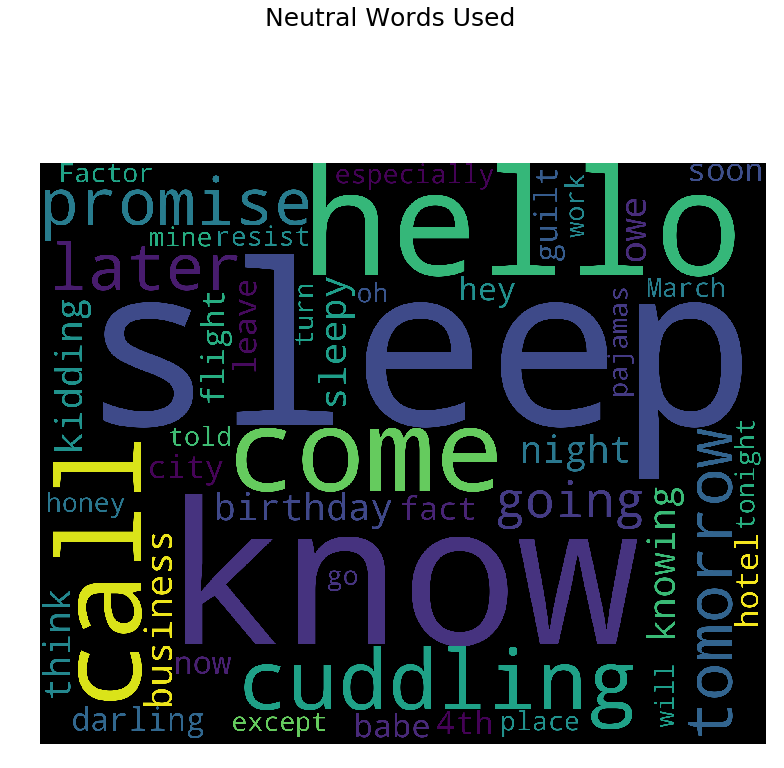

In [11]:
print("Neutral Words Found in the Speech")
wordcloud_figure(transcript_neut_words)
